In [2]:
import math
import torch
import matplotlib.pyplot as plt


In [3]:
# 학습용 데이터
x = torch.linspace(-math.pi, math.pi, 1000)
# 정답
y = torch.sin(x)


In [6]:
# 3차 다항식
# f(x) = ax**3 + bx**2 + cx + d
# 초기화
a= torch.randn(())
b= torch.randn(())
c= torch.randn(())
d= torch.randn(())

y_random = a*x**3 + b*x**2 + c*x + d

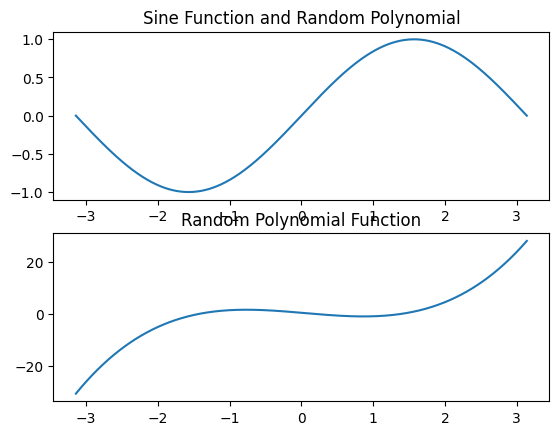

In [8]:
# 시각화
# 1. 실제값 시각화
plt.subplot(2, 1, 1)
plt.title("Sine Function and Random Polynomial")
plt.plot(x,y)
# 2. 임의의 가중치로 만든 예측용 값으로 시각화
plt.subplot(2, 1, 2)
plt.title("Random Polynomial Function")
plt.plot(x,y_random)


epoch: 100, loss = 0.06734535843133926
epoch: 200, loss = 0.06734148412942886
epoch: 300, loss = 0.06733759492635727
epoch: 400, loss = 0.06733372062444687
epoch: 500, loss = 0.06733022630214691
epoch: 600, loss = 0.06732703000307083
epoch: 700, loss = 0.06732384860515594
epoch: 800, loss = 0.06732065230607986
epoch: 900, loss = 0.06731745600700378
epoch: 1000, loss = 0.0673142671585083
epoch: 1100, loss = 0.06731107085943222
epoch: 1200, loss = 0.06730788201093674
epoch: 1300, loss = 0.06730468571186066
epoch: 1400, loss = 0.06730149686336517
epoch: 1500, loss = 0.0672982931137085
epoch: 1600, loss = 0.0672951191663742
epoch: 1700, loss = 0.06729190796613693
epoch: 1800, loss = 0.06728873401880264
epoch: 1900, loss = 0.06728553026914597
epoch: 2000, loss = 0.06728234887123108
epoch: 1800, loss = 0.06728873401880264
epoch: 1900, loss = 0.06728553026914597
epoch: 2000, loss = 0.06728234887123108


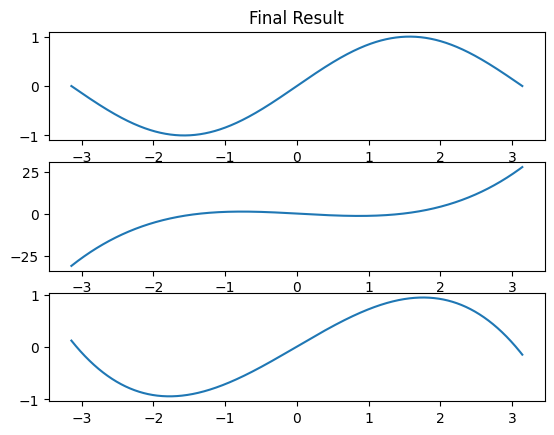

In [21]:
# 파라메터 정의
learning_rate = 1e-6
total_loss = []
for epoch in range(2000):
    # forward
    y_pred = a*x**3 + b*x**2 + c*x + d  # 모델
    # 손실 정의  MSE(평균 제곱 오차)  오차를 제곱 음수를 방지해서 크기만 보도록
    # 오차가 큰 값에 더 큰 패널티 부여
    loss = torch.sqrt((y_pred - y)**2).mean().item()  # .item() 텐서를 숫자로 변환 ( 그래프 추적을 피함 )
    total_loss.append(loss)
    if epoch % 100 == 99:
        print(f"epoch: {epoch+1}, loss = {loss}")
    # 역전파 계산(Backpropagation) loss를 줄이기 위해서 a,b,c,d를 어떻게 바꿔야 하는지 계산
    # 미분
    grad_y_pred = 2.0 * (y_pred - y) / len(x)  #기울기의 미분값 (평균에 맞춰 조정)
    grad_a = 2 * (grad_y_pred * x**3).sum()
    grad_b = 2 * (grad_y_pred * x**2).sum()
    grad_c = 2 * (grad_y_pred * x).sum()
    grad_d = 2 * grad_y_pred.sum()
    # 파라메터 갱신
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 최종 결과 시각화
plt.subplot(3, 1, 1)
plt.title("Final Result")
plt.plot(x,y, label='Sine Function')
plt.subplot(3, 1, 2)
plt.plot(x,y_random, label='Random Polynomial Function')
plt.subplot(3, 1, 3)
plt.plot(x,y_pred, label='Fitted Polynomial Function')

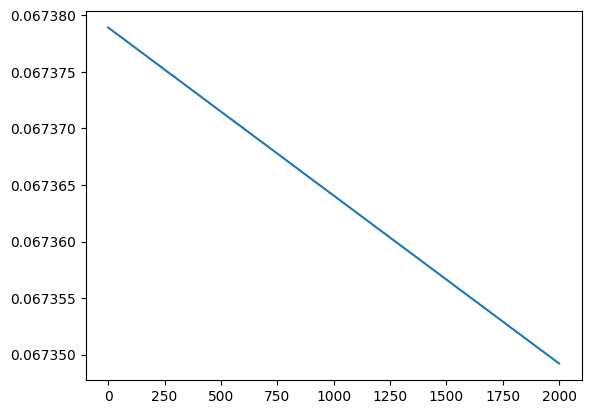

In [20]:
plt.plot(range(2000), total_loss)

D-loss / D-a
D-loss / D-b
D-loss / D-c
D-loss / D-d

loss는 파라메터들과 직접  연관이 없음
다만 다음과 같은 연쇠구조를 가진다(chain)

a,b,c,d -> ypred -> loss
loss = (ypred - loss)

D-loss / D-a = D - ypred / D-a @ D-loss / D-ypred

D-loss / D-ypred = 2x(ypred - y)

D-ypred / D-a = x**3


In [29]:
# 보스턴 집값 예측
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\31799\AppData\Local\Temp\ipykernel_10384\1592935791.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [30]:
data.shape, target.shape

((506, 13), (506,))

In [37]:
# pytorch
# 미분을 자동으로 계산
# 계산된 미분을 optimizer를 통해 적용 : 최적화 알고리즘
import torch
import torch.nn as nn
from torch.optim.adam import Adam
# 모델 정의
model = nn.Sequential(
    nn.Linear(data.shape[1], 100), # 13개의 데이터를 입력받아서 결과를 100차원으로 변환
    nn.ReLU(),
    nn.Linear(100, 1) # 100차원의 예측결과를 받아서 최종 1개를 예측
)

# 하이퍼 파라메터 정의
batch_size = 100
learning_rate = 1e-3

# 옵티마이저 정의
optimizer = Adam(model.parameters(), lr=learning_rate)

# 학습 루프

for epoch in range(100):
    for i in range(len(data) // batch_size):
        start = i * batch_size
        end = start + batch_size
        X = torch.FloatTensor(data[start:end])
        y = torch.FloatTensor(target[start:end])

        optimizer.zero_grad()  # 학습이후 다음 학습에 이전 가중치가 계산되는것을 방지
        preds = model(X)
        loss = nn.MSELoss()(preds, y) 
        loss.backward()  # 자동 미분 계산
        optimizer.step()  # 가중치 갱신
    if epoch % 20 == 9:
        print(f'epoch: {epoch+1}, loss = {loss.item()}')


epoch: 10, loss = 32.422698974609375
epoch: 30, loss = 38.35710525512695
epoch: 50, loss = 37.94438934326172
epoch: 70, loss = 37.671268463134766
epoch: 90, loss = 37.50560760498047
epoch: 70, loss = 37.671268463134766
epoch: 90, loss = 37.50560760498047


순전파 : X -> model -> preds -> loss
역전파 : dloss/lpreds 계산해서 각 선형층의 파라메터(가중치,편향)로 전파
loss.backward() 호출되어서 pytorch autograd가 연쇄법칙(chain rule)을 이용해서 각 파라메터의 .grad를 채움
optim.step() : .grad를 읽어서 파라메터를 갱신

ReLU(활성화 함수)  :  max(0,z)
z가 음수이면 0, 양수면 그대로 전달
역전파 
    - z >0  dReLU(z)/dz = 1
    - z <=0 dReLU(z)/dz =  0
    - 비선형을 제공해서 계산이 간단해진다
    - 기울기 소실이 sigmoid, tanh 보다 유리
    - 음수이면 0이니깐.. 일부 뉴런이 비활성화되어 표현이 희소해진다.  -> LeekyReLU

Adam : 옵티마이져
    - 모멘텀 과 스케일 조정 두가징 방법을 결합
    - 적응적 학습률 : 파라메터별로 학습률을 조정 - > 초기값 안정적
    - 빠른 수렴 : SGD 보다 빠름
    - 튜닝이 거의 필요없음... 기본 파라메터가 lr = 0.001 도 좋은 성능
    - 단점 : 과적합이 다른 최적화 모델에 비해 발생하기 쉬운구조
옵티마이져 : 모델 파라메터를 손실이 줄여들게 갱신하는 역활
p_t : 현재파라메너
n : 학습률
gt : 현재 그레이디언트

p_t+1 = p_t -n*gt
단점 : 
    기울기가 들쑥날쑥(노이즈에  약함)
    모든 파라메터가 같은 학습률을 적용(비효율적)
    --> 모멘텀, 스케일 조정

모멘템 Momentum
    이전 기울기의 방향을 "기억" 해서 관성처럼 부드럽게 이동하는 기법
    vi : 누적된 속도 또는 1차 모멘트
    gt : 현재 그레이디언트
    b1 : 모멘텀의 개수(보통 0.9)
    n : 학습률
    vt = b1vt-1 + (1-b1)gt
        pt+1 = pt - n*vt
시점
    t : 1          단순히 g1을 따라감
    t : 2          이전 속도 v1의 일부를 남겨서 새로운 방향에 더해
    t -> inif      여러 스텝동안 방향이 일정하면 점점 가속되어 빠르게 수렴 
기울기가 변해도 관성때문에 부드럽게 움직임

스케일 조정
    파라메터의 기울기의 크기를 고려해서 학습률을 자동으로 조정
    과거 파라메터의 크기를 추적해서 큰 변동이 있었던 파라메터는 작게, 작은변동은 크게 이동

아담 : 모멘텀 + 스케일 조정 하이브리드 방식
    step 1 : 모멘텀
    step 2 : 스케일 조정
    step 3 : 바이서 보정  초기 스텝에서는 m,v = 0 보정
    step 4 : 최종업데이트 : 모멘텀으로 얻은 방향 + 스케일 조정된 학습률 이동

SGD                     단순히 그레이디언트                     진동심함, 느림
Momentum                과거 방향의 관성 사용                   진동완화, 빠른수렴
RMSProp / AdaGrad       그레이디언트 제곱의 평균으로 스케일조정   파라메터별 자동 학습률
Adam                    모멘텀 + RMSProm 결합                   기본설정도 훌륭함

In [38]:
# 모델 성능 평가  : 예측
print(data.shape , target.shape)
predict = model(torch.FloatTensor(data)).detach().numpy()
predict.shape,   target.shape

(506, 13) (506,)


((506, 1), (506,))

In [39]:
from sklearn.metrics import r2_score
r2_score(target, predict)

0.23945830581459981

In [ ]:
# 적절한 머신러닝 알고리즘으로 비교 평가